# Investment Assignment (Spark Funds)

 Spark Funds wants to make investments in few companies and wants to understand the global trends in investments to take the investment decisions effectively.

## Business objective:
   The business objective is to identify the best sector,countries and a suitable investment type for making investments.

Two constraints for investments:

1.It wants to invest between 5 to 15 million USD per round of investment

2.It wants to invest in English-speaking countries which have English as one of their official         language


# Checkpoint 1: Data Cleaning 

Clean 2 data frames 'companies' and 'rounds2' and merge them together to get master_frame.

In [1]:
#import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
#Read companies file
# UnicodeDecodeError occurred 
companies=pd.read_csv('companies.csv',encoding='palmos')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
# Read rouns2 file
# UnicodeDecodeError occurred 

rounds2 =pd.read_csv('rounds2.csv',encoding='palmos')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Clean company names in the 2 dataframes 

1.Create a 'name' column in rounds2- dataframe for retrieving company name from perma link.

2.In companies -data frame there is a mismatch between permalink and name of the company. so retrive company name from permalink and update the 'name' column .

3.convert 'name' column in both the dataframes to lower case to have a clear merging.

In [4]:
# Get company name from company_permalink and convert them to lower case

rounds2['name'] = rounds2.company_permalink.str.split('/').str[-1].str.lower()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com


In [5]:
rounds2.shape

(114949, 7)

In [6]:
#update 'name' column in companies dataframe using permalink and covert it to lower case
companies['name'] = companies.permalink.str.split('/').str[-1].str.lower()

In [7]:
companies.shape

(66368, 10)

#### Table 1.1

In [8]:
# number of unique companies in rounds2-dataframe
len(rounds2.name.unique())

66368

In [9]:
# number of unique companies in companies-dataframe

len(companies.name.unique())

66368

In [10]:
#rounds2 has company names which are not in companies-dataframe
rounds2[~rounds2.name.isin(companies.name)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name


#### Merge two dataframes
Creates master_frame by mergeing two dataframes on 'name' which is common to both the dataframes.


In [11]:
#merge two dataframes on 'name' which is common to both the dataframes
master_frame = pd.merge(rounds2,companies,on='name')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,permalink,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame,/Organization/-Fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter,/Organization/-Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter,/Organization/-Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-,/Organization/-The-One-Of-Them-Inc-,http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com,/Organization/0-6-Com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [12]:
master_frame.shape

(114949, 16)

### Missing value treatment

In [13]:
# missing values in master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           0
permalink                      0
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

To get better understanding of missing values find fraction of missing values .

In [14]:
# Fraction of missing values
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
permalink                   0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

columns which are not needed for further analysis can be dropped : 

homepage_url,status ,state_code ,region ,city ,funding_round_code and founded_at .


In [15]:
# drop columns
master_frame = master_frame.drop(['homepage_url','status','state_code','region','city','founded_at','funding_round_code'],axis=1)
master_frame.shape

(114949, 9)

Columns which are needed for further analysis : country_code , raised_amount_usd and category_list . 

country_code ,category_list have small percentage of missing values , which can be dropped.     

In [16]:
# Remove NULL values from country_code,raised_amount_usd

master_frame=master_frame[~master_frame.country_code.isnull()]
master_frame=master_frame[~master_frame.category_list.isnull()]
master_frame.shape

(104532, 9)

Checking missing values in raised_amount_usd 

In [17]:
master_frame.raised_amount_usd.describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

There is huge difference between min and max values so its better to drop NULL value in raised_amount_usd column .

In [18]:
# Remove NULL values from raised_amount_usd
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]
master_frame.shape

(88529, 9)

In [19]:
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
name                       0
permalink                  0
category_list              0
country_code               0
dtype: int64

## Checkpoint 2: Funding Type Analysis

Choose the best investment type among the funding types; venture,seed, 
angel and private equity.

In [20]:
#choose only venture,seed,angel and private equity 

master_frame=master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

In [21]:
master_frame.shape

(75124, 9)

#### Finding most representative value of the investment .

In [22]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4400.0,9.715739e+05,7.710904e+06,0.0,152756.5,414906.0,1000000.0,4.945120e+08
private_equity,1820.0,7.393849e+07,2.017765e+08,0.0,5000000.0,20000000.0,75762572.0,4.745460e+09
seed,21095.0,7.477937e+05,2.288318e+06,0.0,68816.5,300000.0,1000000.0,2.000000e+08
venture,47809.0,1.172422e+07,8.821571e+07,0.0,1600000.0,5000000.0,12000000.0,1.760000e+10


 The most representative value of the investment amount is median , as the raised_amount_usd contains 
 outliers . But considering 5-15 Million range , taking mean is not going to affect the choice 
 of Funding Type which is 'venture'.  

In [23]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()

funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64

# Plot 1  Investment type analysis
Shows the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.

#### Plot1 - Analysis :
1.'FT_count' datafrmae contains global count of each Funding Type

2.'FT_Average' dataframe contains total average invested amount per Funding Type in USD (Millions)

3.Merged above 2 dataframes to get 'plot1' dataframe which shows the most suitable Funding Type.

In [24]:
# Getting global count
FT_count=master_frame.groupby(['funding_round_type'])['name'].count().rename('Global count').reset_index()

# Average amount invested in each Funding type
FT_Average = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].apply(lambda x:x.mean()/10**6).round(decimals=2).rename('Average in Millions').reset_index()

# merge global count and average amount of each FT .This dataframe shows the most invested FT

plot1 = pd.merge(FT_count,FT_Average,on='funding_round_type')

plot1.head(10)

,funding_round_type,Global count,Average in Millions
0,angel,4400,0.97
1,private_equity,1820,73.94
2,seed,21095,0.75
3,venture,47809,11.72


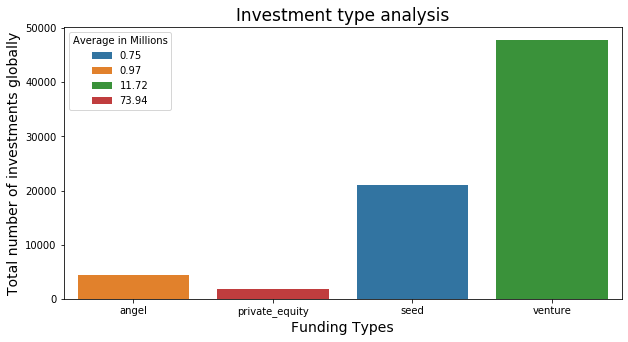

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(data=plot1, x="funding_round_type", y="Global count",ci=None,hue='Average in Millions',dodge=False)

plt.title("Investment type analysis",size=17)
plt.xlabel("Funding Types", size=14)
plt.ylabel("Total number of investments globally", size=14)
plt.show()

 From the above it is clear that 'venture' is the most suitable one for investment. 
The average amount of investment in venture lies between 5 to 15 million USD.

In [26]:
#choose only 'venture'

master_frame=master_frame[master_frame.funding_round_type=='venture'].reset_index(drop=True)
master_frame.shape

(47809, 9)

# Checkpoint 3: Country Analysis

Identify the top three English-speaking countries based on total amount invested aross all sectors in the data frame top9.

In [27]:
master_frame.groupby(['country_code'])['raised_amount_usd'].sum().nlargest(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Create top9 dataframe which contains top 9 countries 
based on the total amount invested in USD.
Top 3 English-speaking countries are USA ,GBR and IND

In [28]:
# Keeps top 9 countries based on their total investments

top9= master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]


# Checkpoint 4: Sector Analysis 1

Map each primary sector to its main sector. 
Get main sector information from mapping dataframe and merge it with top9.

In [29]:
#Extract Primary sector name from category list
top9['Primary sector']= top9['category_list'].str.split('|').str[0]

mapping file has all primary sectors which are mapped to 8 main sectors.

In [30]:
mapping=pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [31]:
#unpivot the mapping - dataframe
mapping=mapping.melt(id_vars='category_list',var_name='main sector')
mapping = mapping[mapping.value==1]
mapping.head()

,category_list,main sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [32]:
#Rename category_list to primary sector in mapping-dataframe to ease the merging

mapping.columns = mapping.columns.str.replace('category_list', 'Primary sector')
mapping=mapping.drop(['value'],axis=1)

In [33]:
mapping.head()

,Primary sector,main sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [34]:
#merge mapping and top9 dataframes on primary sector
top9= pd.merge(top9,mapping, on='Primary sector') 

In [35]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,-fame,/Organization/-Fame,Media,IND,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,/Organization/90Min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,/Organization/90Min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,/Organization/90Min,Media|News|Publishing|Soccer|Sports,GBR,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,all-def-digital,/Organization/All-Def-Digital,Media,USA,Media,Entertainment


# Checkpoint 5: Sector Analysis 2 
Analyse top investing sectors for top 3 English speaking countries

### Seperate dataframes for each country

Create D1,D2 and D3 data frames for top3 countries and their raised amount is in the range 5-15 Million usd.

D1= USA , D2 = GBR , D3= IND 

In [36]:
#Seperate dataframes for each country.

D1=top9[top9.country_code=='USA']
D1=D1[(D1.raised_amount_usd>=5000000) & (D1.raised_amount_usd<=15000000)]

D2=top9[top9.country_code=='GBR'].reset_index()
D2=D2[(D2.raised_amount_usd>=5000000) & (D2.raised_amount_usd<=15000000)]

D3=top9[top9.country_code=='IND'].reset_index()
D3=D3[(D3.raised_amount_usd>=5000000) & (D3.raised_amount_usd<=15000000)]

 Create 2 columns in D1 , D2 and D3 dataframes
 
1.'mainsector_count' column to get total number of investments in each main sectors

2.'mainsector_sum' column to get total amount invested in each main sector

In [37]:
D1['mainsector_count']=D1.groupby(['main sector'])['Primary sector'].transform('count')
D1['mainsector_sum']=D1.groupby(['main sector'])['raised_amount_usd'].transform('sum')
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector,mainsector_count,mainsector_sum
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,all-def-digital,/Organization/All-Def-Digital,Media,USA,Media,Entertainment,580,5.000213e+09
14,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,chefs-feed,/Organization/Chefs-Feed,Media|Mobile|Restaurants|Technology,USA,Media,Entertainment,580,5.000213e+09
20,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,huffingtonpost,/Organization/Huffingtonpost,Media|News|Publishing,USA,Media,Entertainment,580,5.000213e+09
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,huffingtonpost,/Organization/Huffingtonpost,Media|News|Publishing,USA,Media,Entertainment,580,5.000213e+09
26,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,matchmine,/Organization/Matchmine,Media|News|Reviews and Recommendations,USA,Media,Entertainment,580,5.000213e+09


In [38]:
D2['mainsector_count']=D2.groupby(['main sector'])['Primary sector'].transform('count')
D2['mainsector_sum']=D2.groupby(['main sector'])['raised_amount_usd'].transform('sum')


In [39]:
D3['mainsector_count']=D3.groupby(['main sector'])['Primary sector'].transform('count')
D3['mainsector_sum']=D3.groupby(['main sector'])['raised_amount_usd'].transform('sum')


 ### Table 5.1
 #### 1. Total number of investments in Top3 countries
all the observations refer to investments of the venture FT within 5-15 M USD range. 

In [40]:
D1.raised_amount_usd.count()

11149

In [41]:
D2.raised_amount_usd.count()

577

In [42]:
D3.raised_amount_usd.count()

299

####  2. Total amount of investment (USD) in Top 3 countries 
all the observations refer to investments of venture FT within 5-15 M USD range. 

In [43]:
D1.raised_amount_usd.sum()

99661524549.0

In [44]:
D2.raised_amount_usd.sum()

5028704358.0

In [45]:
D3.raised_amount_usd.sum()

2683537552.0

#### 3. Number of investment in top 3 sectors of Top 3 countries
all the observations refer to investments of the type FT within 5-15 M USD range. 

In [46]:
D1['main sector'].value_counts().head(3)

Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: main sector, dtype: int64

In [47]:
D2['main sector'].value_counts().head(3)

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: main sector, dtype: int64

In [48]:
D3['main sector'].value_counts().head(3)

Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: main sector, dtype: int64

#### 4. which company received the highest investment in top 2 sectors ?

5-15 M USD range is not considered here . If the range is considered there are multiple companies present for the amount 15 M . so top company names in top sectors are found from top9 dataframe .


In [49]:
#1.USA  top sector 1 = others

top9[(top9.country_code=='USA') &(top9['main sector']=='Others')].nlargest(1,'raised_amount_usd')


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector
8333,/ORGANIZATION/SOCIAL-FINANCE,/funding-round/1609f1ba4de61c4760c91dc69f4ae980,venture,30-09-2015,1.000000e+09,social-finance,/Organization/Social-Finance,Education|Finance|Financial Services|Peer-to-Peer,USA,Education,Others


In [50]:
# USA top sector 2 
top9[(top9.country_code=='USA') &(top9['main sector']=='Cleantech / Semiconductors')].nlargest(1,'raised_amount_usd')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector
29542,/ORGANIZATION/FREESCALE,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21-10-2006,1.760000e+10,freescale,/Organization/Freescale,Semiconductors,USA,Semiconductors,Cleantech / Semiconductors


In [51]:
#GBR top sector 1 
top9[(top9.country_code=='GBR') &(top9['main sector']=='Others')].nlargest(1,'raised_amount_usd')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector
37730,/ORGANIZATION/ONEWEB,/funding-round/0a9a5d2d5b49ac05b926325cbbbcfb49,venture,26-06-2015,500000000.0,oneweb,/Organization/Oneweb,Technology,GBR,Technology,Others


In [52]:
# GBR top sector 2

top9[(top9.country_code=='GBR') &(top9['main sector']=='Cleantech / Semiconductors')].nlargest(1,'raised_amount_usd')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector
4336,/organization/immunocore,/funding-round/6159299c71ab84032910b48ceed406cf,venture,16-07-2015,320000000.0,immunocore,/Organization/Immunocore,Biotechnology|Market Research,GBR,Biotechnology,Cleantech / Semiconductors


In [53]:
#company in IND top sector 1 
top9[(top9.country_code=='IND') &(top9['main sector']=='Others')].nlargest(1,'raised_amount_usd')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector
21812,/ORGANIZATION/FLIPKART,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,venture,29-07-2014,1.000000e+09,flipkart,/Organization/Flipkart,E-Commerce|Online Shopping,IND,E-Commerce,Others


In [54]:
# IND top sector 2
top9[(top9.country_code=='IND') &(top9['main sector']=='News, Search and Messaging')].nlargest(1,'raised_amount_usd')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,permalink,category_list,country_code,Primary sector,main sector
843,/organization/quikr-india,/funding-round/c3d8b1a4db1354d4c3dbc60a8171565f,venture,07-04-2015,150000000.0,quikr-india,/Organization/Quikr-India,Curated Web,IND,Curated Web,"News, Search and Messaging"


# Plot2 Country Analysis

Top9 countries based on their total amount invested in usd across all sectors in 'venture' FT.

In [55]:
plot2=master_frame.groupby(['country_code'])['raised_amount_usd'].sum().nlargest(9).reset_index()

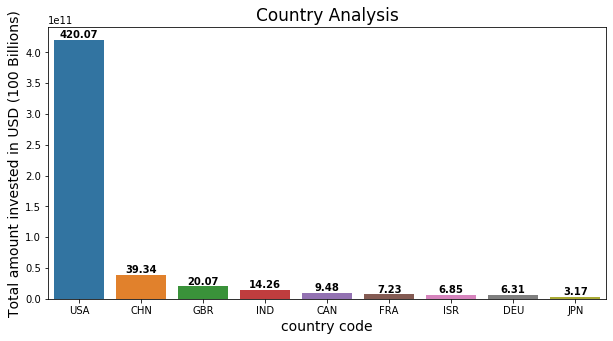

In [56]:
#plot2   top 9 countries aganist the total amount of investments in 'venture' funding type.

plt.figure(figsize=(10, 5))
fig=sns.barplot(data=plot2, x='country_code', y="raised_amount_usd")
for x in fig.patches:
    fig.annotate(format(x.get_height()/10**9,'.2f'),(x.get_x() + x.get_width() / 2., x.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5),  weight='bold',
                   textcoords = 'offset points')

plt.title("Country Analysis",size=17)
plt.xlabel("country code", size=14)
plt.ylabel("Total amount invested in USD (100 Billions)", size=14)

plt.show()


#  Plot 3 - Sector analysis

Top3 Sectors in Top3 countries

Dataframes c1,c2,c3 contains top3 sectors of top3 countries based on their number of investments.

plot3 dataframes includes c1,c2 and c3 dataframes , from which we can plot top3 sectors of top3 countries based on their number of investments.


In [57]:
# top3 sectors of top3 countries

c1=D1.groupby(['country_code','main sector'])['mainsector_count'].apply(lambda x:x.max()).nlargest(3)
c2=D2.groupby(['country_code','main sector'])['mainsector_count'].apply(lambda x:x.max()).nlargest(3)
c3=D3.groupby(['country_code','main sector'])['mainsector_count'].apply(lambda x:x.max()).nlargest(3)

plot3 = pd.concat([c1,c2,c3]).reset_index()
plot3.head(20)

,country_code,main sector,mainsector_count
0,USA,Others,2923
1,USA,Cleantech / Semiconductors,2297
2,USA,"Social, Finance, Analytics, Advertising",1912
3,GBR,Others,143
4,GBR,Cleantech / Semiconductors,127
5,GBR,"Social, Finance, Analytics, Advertising",98
6,IND,Others,109
7,IND,"News, Search and Messaging",52
8,IND,Entertainment,33


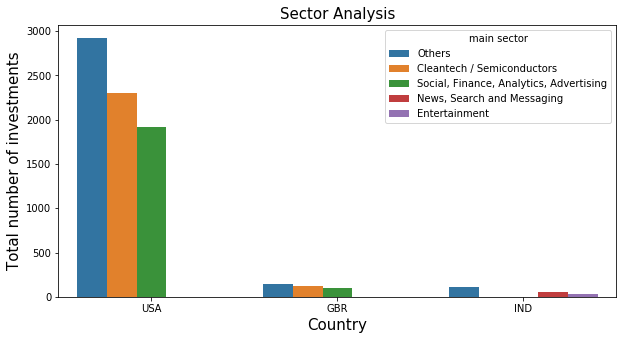

In [58]:
# Plot3

plt.figure(figsize=(10,5))
sns.barplot(x="country_code", y="mainsector_count", hue="main sector", data=plot3)
plt.title("Sector Analysis",size=15)
plt.xlabel("Country", size=15)
plt.ylabel("Total number of investments", size=15)
plt.show()